# Exercise 2

## Setup

In [63]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
import seaborn as sns
import math
import statistics

In [64]:
birds = pd.read_csv('./birds2025.csv', sep=';')
birds.head()

,species,group,length,wspan,weight,AR,wload,back,belly,ftype
0,naurulokki,laridae,34-38,86-99,200-350,8.13,0.31,light grey,white,B
1,harmaalokki,laridae,55-65,123-148,800-1300,8.24,0.64,bluish grey,white,B
2,isolokki,laridae,63-68,138-158,1000-1800,8.24,0.66,bluish grey,white,B
3,kalatiira,sternidae,36-42,70-80,100-145,9.14,0.24,grey,white,B
4,lapintiira,sternidae,33-37,66-77,90-130,8.97,0.20,grey,white,B


## Tasks

### Subtask a

Replace interval columns with mean values.

In [65]:
def meanval(a: str) -> float:
    a_split = a.split('-')
    return (float(a_split[0]) + float(a_split[1])) / 2

In [66]:
birds['mean_length'] = birds['length'].apply(lambda x: meanval(x))
birds['mean_wspan'] = birds['wspan'].apply(lambda x: meanval(x))
birds['mean_weight'] = birds['weight'].apply(lambda x: meanval(x))
birds.drop(columns=['length', 'wspan', 'weight'], inplace=True)
birds.head()

,species,group,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight
0,naurulokki,laridae,8.13,0.31,light grey,white,B,36.0,92.5,275.0
1,harmaalokki,laridae,8.24,0.64,bluish grey,white,B,60.0,135.5,1050.0
2,isolokki,laridae,8.24,0.66,bluish grey,white,B,65.5,148.0,1400.0
3,kalatiira,sternidae,9.14,0.24,grey,white,B,39.0,75.0,122.5
4,lapintiira,sternidae,8.97,0.20,grey,white,B,35.0,71.5,110.0


Compute BMI and WSI

In [67]:
birds['BMI'] = (birds['mean_weight'] / 1000) / (birds['mean_length'] / 100) ** 2
birds.head()

,species,group,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI
0,naurulokki,laridae,8.13,0.31,light grey,white,B,36.0,92.5,275.0,2.121914
1,harmaalokki,laridae,8.24,0.64,bluish grey,white,B,60.0,135.5,1050.0,2.916667
2,isolokki,laridae,8.24,0.66,bluish grey,white,B,65.5,148.0,1400.0,3.263213
3,kalatiira,sternidae,9.14,0.24,grey,white,B,39.0,75.0,122.5,0.805391
4,lapintiira,sternidae,8.97,0.20,grey,white,B,35.0,71.5,110.0,0.897959


In [68]:
birds['WSI'] = birds['mean_wspan'] / birds['mean_length']
birds.head()

,species,group,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI,WSI
0,naurulokki,laridae,8.13,0.31,light grey,white,B,36.0,92.5,275.0,2.121914,2.569444
1,harmaalokki,laridae,8.24,0.64,bluish grey,white,B,60.0,135.5,1050.0,2.916667,2.258333
2,isolokki,laridae,8.24,0.66,bluish grey,white,B,65.5,148.0,1400.0,3.263213,2.259542
3,kalatiira,sternidae,9.14,0.24,grey,white,B,39.0,75.0,122.5,0.805391,1.923077
4,lapintiira,sternidae,8.97,0.20,grey,white,B,35.0,71.5,110.0,0.897959,2.042857


Split dataset.

In [69]:
birds.set_index('species', inplace=True)
groups = birds["group"]
birds.drop(columns=['group'], inplace=True)
birds.head()

,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI,WSI
species,,,,,,,,,,
naurulokki,8.13,0.31,light grey,white,B,36.0,92.5,275.0,2.121914,2.569444
harmaalokki,8.24,0.64,bluish grey,white,B,60.0,135.5,1050.0,2.916667,2.258333
isolokki,8.24,0.66,bluish grey,white,B,65.5,148.0,1400.0,3.263213,2.259542
kalatiira,9.14,0.24,grey,white,B,39.0,75.0,122.5,0.805391,1.923077
lapintiira,8.97,0.20,grey,white,B,35.0,71.5,110.0,0.897959,2.042857


Assess numerical feature distribution.

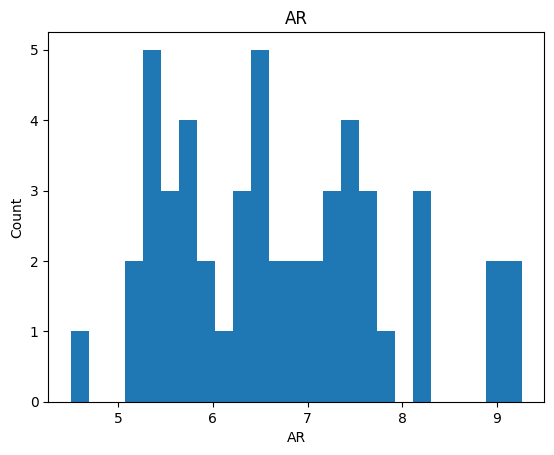

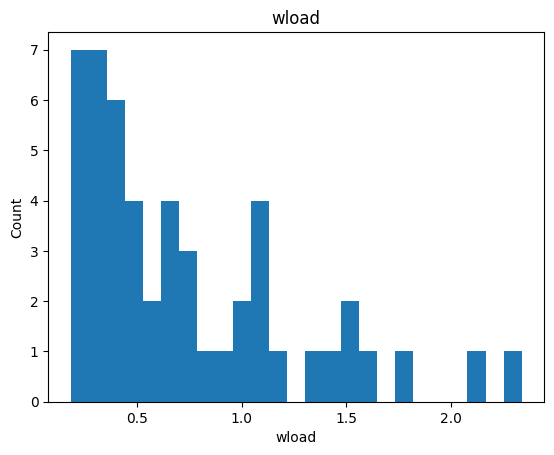

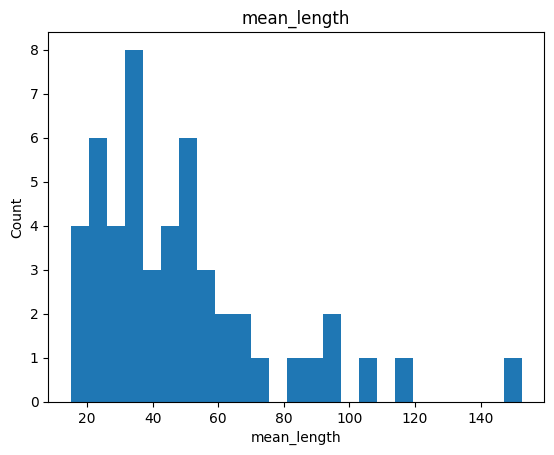

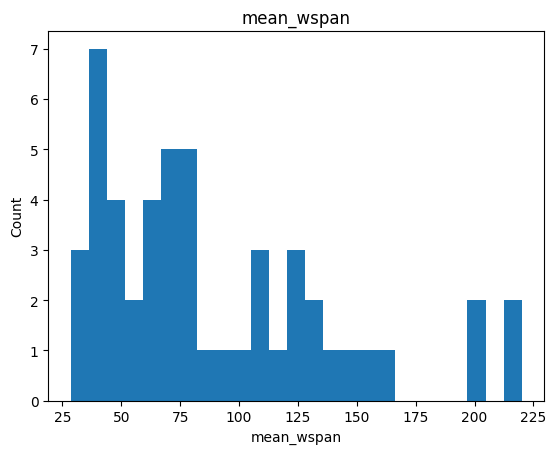

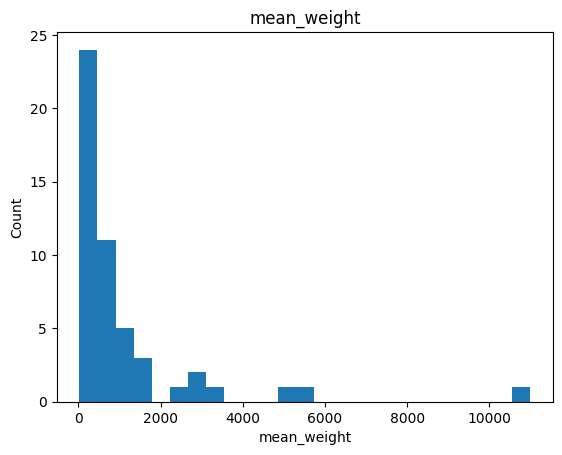

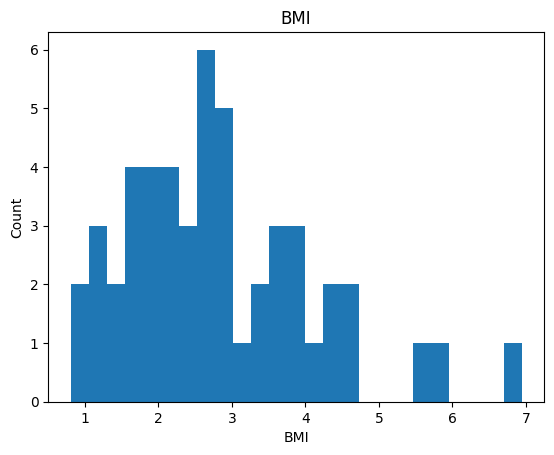

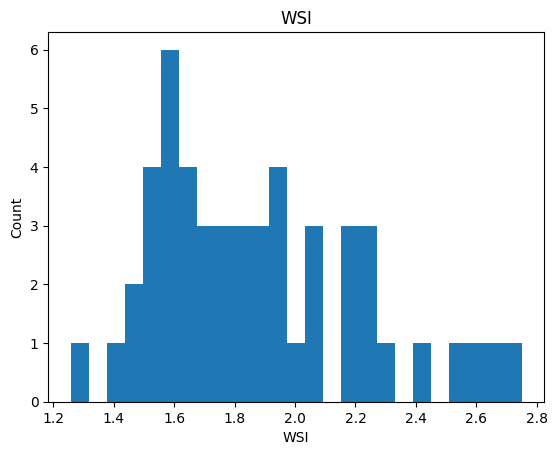

In [70]:
for i in birds.select_dtypes(include=['float64']).columns:
    plt.hist(birds[i], bins = 25)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

Scale numerical features.

In [71]:
scaler = MinMaxScaler()
num_cols = birds.select_dtypes(include=['float64']).columns
birds[num_cols] = pd.DataFrame(scaler.fit_transform(birds[num_cols]), columns=num_cols, index=birds.index)
birds.head()

,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI,WSI
species,,,,,,,,,,
naurulokki,0.762605,0.060185,light grey,white,B,0.152727,0.334204,0.022779,0.214481,0.879054
harmaalokki,0.785714,0.212963,bluish grey,white,B,0.327273,0.558747,0.093394,0.343958,0.670654
isolokki,0.785714,0.222222,bluish grey,white,B,0.367273,0.624021,0.125285,0.400416,0.671464
kalatiira,0.974790,0.027778,grey,white,B,0.174545,0.242820,0.008884,0.000000,0.446080
lapintiira,0.939076,0.009259,grey,white,B,0.145455,0.224543,0.007745,0.015081,0.526316


Pairwise distances based on numerical features.

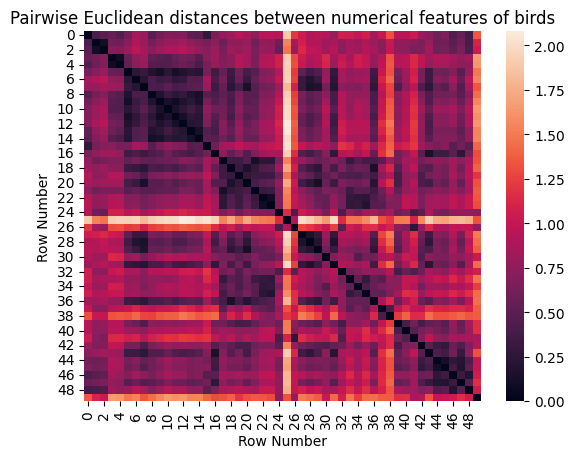

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.412240,0.494961,0.537179,0.458502,0.614269,0.844823,0.798031,0.483868,0.602311,...,0.945243,1.045541,0.806295,0.720158,0.606286,0.658066,0.431060,0.557765,0.378187,1.351111
1,0.412240,0.000000,0.100755,0.607504,0.588298,0.713402,0.894036,0.788759,0.624433,0.722079,...,0.742517,0.708791,0.667645,0.790164,0.580133,0.601454,0.489592,0.597813,0.404217,1.111911
2,0.494961,0.100755,0.000000,0.693322,0.678988,0.793716,0.963168,0.843763,0.709864,0.806920,...,0.745752,0.656002,0.676412,0.849024,0.604778,0.625901,0.522463,0.646808,0.425812,1.036811
3,0.537179,0.607504,0.693322,0.000000,0.097289,0.558724,0.747743,0.806091,0.517132,0.479969,...,0.941824,1.122554,0.982712,0.819173,0.906038,0.893173,0.843769,0.772793,0.819415,1.658097
4,0.458502,0.588298,0.678988,0.097289,0.000000,0.527917,0.735403,0.788746,0.468235,0.450379,...,0.953783,1.136505,0.960636,0.781061,0.860565,0.856511,0.783774,0.727560,0.761523,1.634855
5,0.614269,0.713402,0.793716,0.558724,0.527917,0.000000,0.243948,0.302904,0.182761,0.112892,...,0.828375,1.069008,0.626720,0.334024,0.616545,0.584045,0.690634,0.476636,0.792848,1.488891
6,0.844823,0.894036,0.963168,0.747743,0.735403,0.243948,0.000000,0.226925,0.414222,0.317034,...,0.825348,1.103945,0.639994,0.325780,0.701961,0.642132,0.841146,0.566475,0.969449,1.545433
7,0.798031,0.788759,0.843763,0.806091,0.788746,0.302904,0.226925,0.000000,0.412983,0.403661,...,0.741083,0.959467,0.423306,0.253123,0.543506,0.481634,0.720250,0.465289,0.857201,1.340114
8,0.483868,0.624433,0.709864,0.517132,0.468235,0.182761,0.414222,0.412983,0.000000,0.182537,...,0.905566,1.088247,0.646703,0.434527,0.607821,0.603690,0.630586,0.503395,0.708963,1.453638
9,0.602311,0.722079,0.806920,0.479969,0.450379,0.112892,0.317034,0.403661,0.182537,0.000000,...,0.889452,1.125469,0.717948,0.437411,0.699389,0.671926,0.745136,0.554984,0.826393,1.556032


In [72]:
cdist_matrix = cdist(birds[num_cols], birds[num_cols], metric='euclidean')
sns.heatmap(cdist_matrix)
plt.title('Pairwise Euclidean distances between numerical features of birds')
plt.xlabel('Row Number')
plt.ylabel('Row Number')
plt.show()
display(pd.DataFrame(cdist_matrix))

Text(0.5, 1.0, 'Correlation matrix of numerical features of birds')

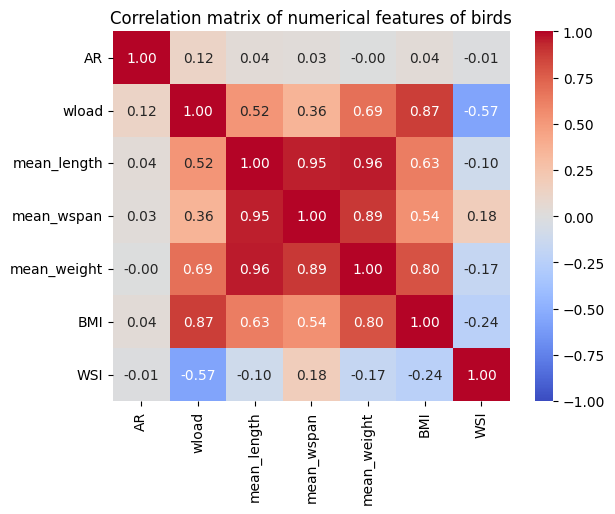

In [73]:
# Numerical feature correlations
corr = birds[num_cols].corr(method="spearman")
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix of numerical features of birds')

In [74]:
birds = birds.drop(columns=["mean_length"])
num_cols = birds.select_dtypes(include=['float64']).columns

### Subtask b

Identify categorical features.

In [75]:
categ_cols = birds.select_dtypes(include=['object']).columns

Defining distance measure for color features.

In [76]:
main_colors = ['black', 'white', 'brown', 'grey', 'beige']

def split_color(a: str) -> list:
    if '-' in a:
        a_split = a.split('-')
    elif ' ' in a:
        a_split = a.split(' ')
    else:
        a_split = [a]
    return a_split

def color_similarity(a: str, b: str) -> float:
    a_split = split_color(a)
    b_split = split_color(b)

    intersection = set(a_split).intersection(set(b_split))
    
    if a_split == b_split: # exact match
        return 1.0
    elif any(i_color in main_colors for i_color in intersection): # same main color
        return 0.5
    else: # no match
        return 0.0


Overlap distance.

In [77]:
def get_categ_dist(row1, row2) -> float:
    sim = 0.0

    for col in categ_cols:
        sim += color_similarity(row1[col], row2[col])

    return 1-(sim / len(categ_cols))


Combined pairwise distance (numerical + categorical).

In [78]:
def l2(row_1, row_2):
    sum_of_squares = 0
    for col in num_cols:
        sum_of_squares += abs(row_1[col] - row_2[col]) ** 2
    dist = math.sqrt(sum_of_squares)
    return dist

def calculate_pairwise_distance(df, distance_function):
    num_rows = len(df)
    distances = [[0.0] * num_rows for _ in range(num_rows)]
    for i in range(num_rows):
        for j in range(num_rows): #Calculating 2 times, just to doublecheck
            row_1 = df.iloc[i]
            row_2 = df.iloc[j]

            dist = distance_function(row_1, row_2)
            distances[i][j] = dist

    return pd.DataFrame(distances)

def create_distance_list(distances):
    distances_list = []
    for i in range(len(distances)):
        for j in range(i + 1, len(distances)):
            distances_list.append(distances.iloc[i, j])
    return distances_list

def get_std_dev(distance_list):
    std_dev = statistics.stdev(distance_list)
    print(f"Standard deviation of the distances: {std_dev}")
    return std_dev

In [79]:
# Numerical features
pairwise_distances = calculate_pairwise_distance(birds, l2)

l2_distance_list = create_distance_list(pairwise_distances)

l2_std = get_std_dev(l2_distance_list)

Standard deviation of the distances: 0.31935723783892983


In [80]:
# Categorical features
categ_pairwise = calculate_pairwise_distance(birds, get_categ_dist)

categ_std = get_std_dev(create_distance_list(categ_pairwise))


Standard deviation of the distances: 0.2534869388690408


In [81]:
def mixed_metric(row1, row2):
    lambda_ = 0.8
    return lambda_*l2(row1, row2)/l2_std+(1-lambda_)*get_categ_dist(row1, row2)/categ_std

In [82]:
mixed_distances = calculate_pairwise_distance(birds, mixed_metric)
mixed_distances.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,1.067040,1.248858,1.476038,1.279917,2.052823,2.634448,2.788005,1.712886,2.014624,...,2.241334,2.798208,2.510961,2.461423,2.148025,2.267237,1.842521,2.036032,1.684309,4.032915
1,1.067040,0.000000,0.231652,1.604440,1.533056,2.198915,2.678221,2.711650,1.933140,2.200846,...,2.010315,2.076380,2.197252,2.583768,2.103421,2.161926,1.998955,2.140307,1.793508,3.523801
2,1.248858,0.231652,0.000000,1.799843,1.739062,2.375921,2.828945,2.828302,2.122370,2.389379,...,2.052152,1.980289,2.212477,2.710457,2.152387,2.214777,2.062792,2.247895,1.831073,3.350709
3,1.476038,1.604440,1.799843,0.000000,0.232563,1.903838,2.384083,2.806963,1.786068,1.690151,...,2.390302,3.045942,2.835490,2.708256,2.914759,2.874636,2.894798,2.585616,2.825748,4.841463
4,1.279917,1.533056,1.739062,0.232563,0.000000,1.837072,2.360893,2.764829,1.676622,1.630988,...,2.387537,3.048038,2.768830,2.614079,2.790876,2.770329,2.735737,2.463386,2.668237,4.764438


Text(0.5, 1.0, 'Mutual information matrix of categorical features of birds')

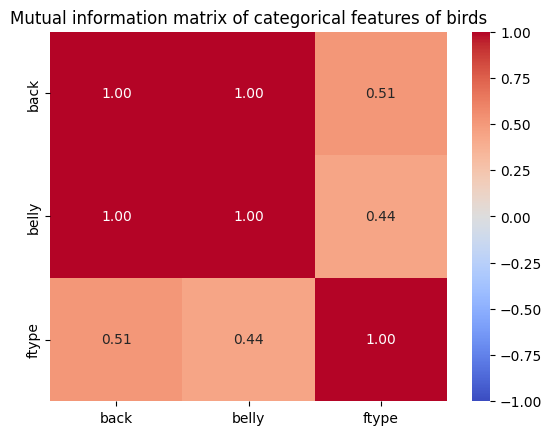

In [83]:
# Mutual information between categorical features
from sklearn.metrics import mutual_info_score

categ_data = birds[categ_cols].astype('category').apply(lambda x: x.cat.codes)
corr = categ_data.corr(method=mutual_info_score)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mutual information matrix of categorical features of birds')

In [84]:
birds = birds.drop(columns=["back"])
categ_cols = birds.select_dtypes(include=['object']).columns

### Subtask c

In [85]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import normalized_mutual_info_score

In [86]:
mixed_distances = calculate_pairwise_distance(birds, mixed_metric)
mixed_distances.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.935541,1.117359,1.344539,1.148418,1.921323,2.502949,2.788005,1.581387,1.883125,...,2.307084,2.666709,2.576710,2.395673,2.082275,2.201488,1.842521,1.970282,1.684309,4.032915
1,0.935541,0.000000,0.231652,1.472940,1.401557,2.067416,2.546722,2.711650,1.801641,2.069347,...,1.944565,1.944881,2.263002,2.518018,2.037671,2.096177,1.998955,2.074558,1.793508,3.523801
2,1.117359,0.231652,0.000000,1.668344,1.607563,2.244421,2.697446,2.828302,1.990871,2.257880,...,1.986402,1.848790,2.278227,2.644708,2.086637,2.149028,2.062792,2.182146,1.831073,3.350709
3,1.344539,1.472940,1.668344,0.000000,0.232563,1.772339,2.252584,2.806963,1.654569,1.558651,...,2.324552,2.914443,3.032738,2.642507,2.849010,2.808887,2.894798,2.519866,2.825748,4.841463
4,1.148418,1.401557,1.607563,0.232563,0.000000,1.705572,2.229394,2.764829,1.545123,1.499488,...,2.321787,2.916539,2.966079,2.548329,2.725126,2.704580,2.735737,2.397636,2.668237,4.764438


In [87]:
bird_map = {
    "charadriiformes": "1",
    "lari": "1.1",
    "laridae": "1.1.1",
    "sternidae": "1.1.2",
    "charadrii": "1.2",
    "scolopacidae": "1.2.1",
    "charadriidae": "1.2.2",
    "haematopodidae": "1.2.3",
    "anatidae": "2",
    "anatinae": "2.1",
    "dabbling ducks": "2.1.1",
    "diving ducks": "2.1.2",
    "anserinae": "2.2",
    "gruifores": "3",
    "gruidae": "3.1",
    "rallidae": "3.2",
    "phalacrocoracidae": "4",
    "podicipedidae": "5",
    "gaviidae": "6",
    "ardeidae": "7",
    "accipitriformes": "8",
    "accipitridae": "8.1"
}

In [88]:
birds['group'] = groups
birds['group_ID'] = birds['group'].map(bird_map)
birds

,AR,wload,belly,ftype,mean_wspan,mean_weight,BMI,WSI,group,group_ID
species,,,,,,,,,,
naurulokki,0.762605,0.060185,white,B,0.334204,0.022779,0.214481,0.879054,laridae,1.1.1
harmaalokki,0.785714,0.212963,white,B,0.558747,0.093394,0.343958,0.670654,laridae,1.1.1
isolokki,0.785714,0.222222,white,B,0.624021,0.125285,0.400416,0.671464,laridae,1.1.1
kalatiira,0.974790,0.027778,white,B,0.242820,0.008884,0.000000,0.446080,sternidae,1.1.2
lapintiira,0.939076,0.009259,white,B,0.224543,0.007745,0.015081,0.526316,sternidae,1.1.2
suokukko,0.468487,0.083333,white,C,0.099217,0.007745,0.144386,0.405667,scolopacidae,1.2.1
taivaanvuohi,0.296218,0.101852,white,C,0.070496,0.006834,0.109788,0.239971,scolopacidae,1.2.1
lehtokurppa,0.247899,0.166667,dappled beige,C,0.164491,0.025513,0.274415,0.306220,scolopacidae,1.2.1
karikukko,0.569328,0.125000,white,C,0.091384,0.007745,0.222778,0.527379,scolopacidae,1.2.1


In [89]:
def plot_dendrogram(model: AgglomerativeClustering, n_cluster, linkage, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]).astype(float)
    threshold = (linkage_matrix[-(n_cluster-1), 2] + linkage_matrix[-n_cluster, 2]) / 2
    dendrogram(linkage_matrix, color_threshold=threshold,  above_threshold_color='black', **kwargs)
    plt.axhline(y=threshold, color='r', linestyle='--')
    plt.title(f'Hierarchical Clustering Dendrogram\n(k={n_cluster}, linkage={linkage})')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()


In [90]:
def hier_clust(data, n_clusters, method):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=method, compute_distances=True, metric='precomputed')
    #model.fit(data)
    
    labels = model.fit_predict(data)
    plot_dendrogram(model, n_cluster=n_clusters, linkage=method, labels=birds['group_ID'], leaf_rotation=90)
    return labels

c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


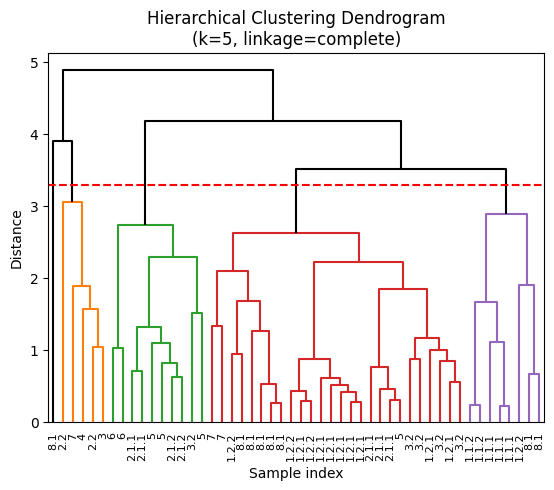

[1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 1 4 2 4 4 4 2 2 2 0 0 0 4 4 4 2 4 0 2 2 2 4
 2 2 4 4 0 4 4 4 4 1 4 1 3]
Singletons:  1
Normalized Information Score: 0.4957513582474408, k=5, method=complete


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


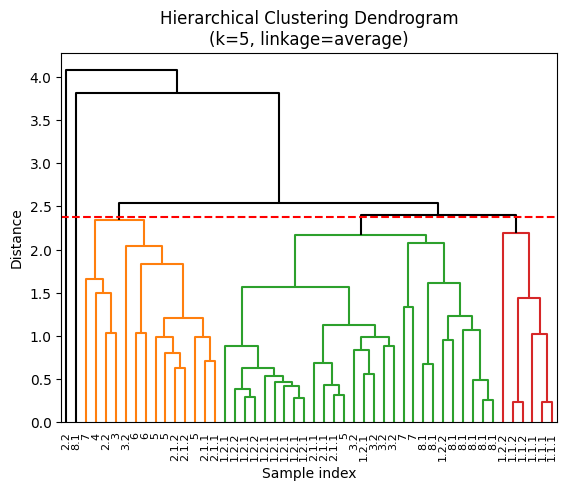

[1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 1 4 0 4 4 4 0 0 0 0 3 0 4 4 4 0 4 0 0 0 0 4
 0 0 4 4 0 4 4 4 4 4 4 4 2]
Singletons:  2
Normalized Information Score: 0.46277357406026176, k=5, method=average


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


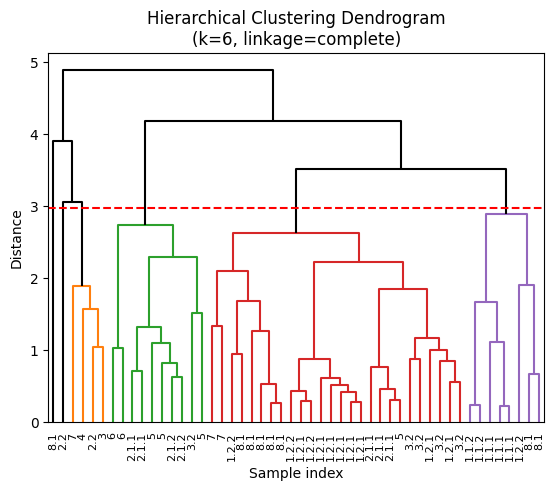

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 2 2 2 4 5 4 1 1 1 2 1 4 2 2 2 1
 2 2 1 1 4 1 1 1 1 0 1 0 3]
Singletons:  2
Normalized Information Score: 0.49863013339384327, k=6, method=complete


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


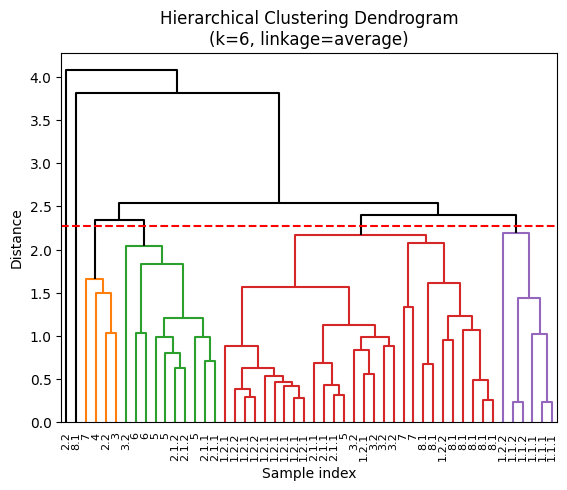

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 4 1 1 1 4 4 4 2 3 2 1 1 1 4 1 2 4 4 4 1
 4 4 1 1 2 1 1 1 1 1 1 1 5]
Singletons:  2
Normalized Information Score: 0.5260646836017407, k=6, method=average


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


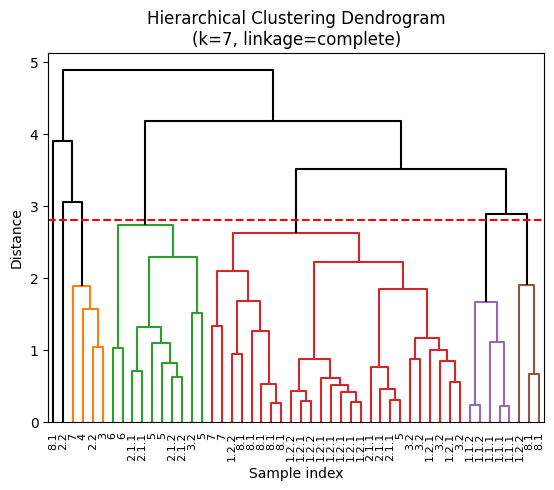

[6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 0 0 0 4 5 4 1 1 1 0 1 4 0 0 0 1
 0 0 1 1 4 1 1 1 1 2 1 2 3]
Singletons:  2
Normalized Information Score: 0.5363210508871618, k=7, method=complete


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


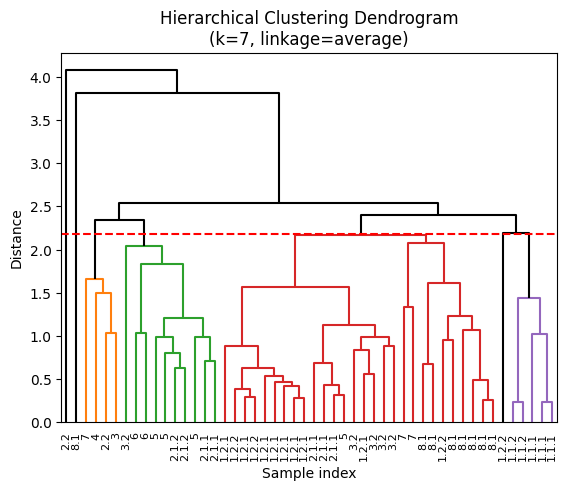

[4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 6 0 1 0 0 0 1 1 1 2 3 2 0 0 0 1 0 2 1 1 1 0
 1 1 0 0 2 0 0 0 0 0 0 0 5]
Singletons:  3
Normalized Information Score: 0.5452005882933605, k=7, method=average


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


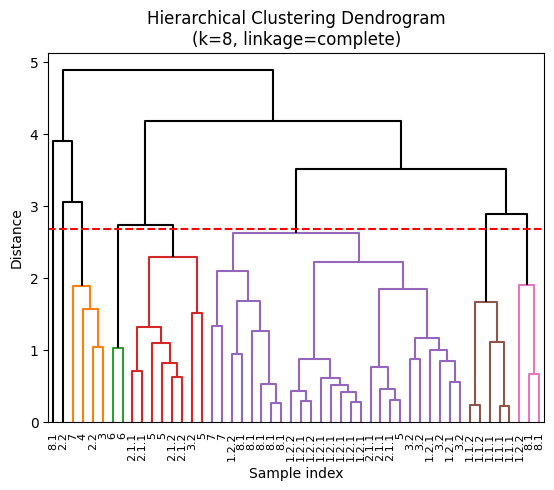

[6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 1 1 1 4 5 4 0 0 0 1 0 4 1 1 1 0
 3 3 0 0 4 0 0 0 0 2 0 2 7]
Singletons:  2
Normalized Information Score: 0.5701201723636341, k=8, method=complete


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


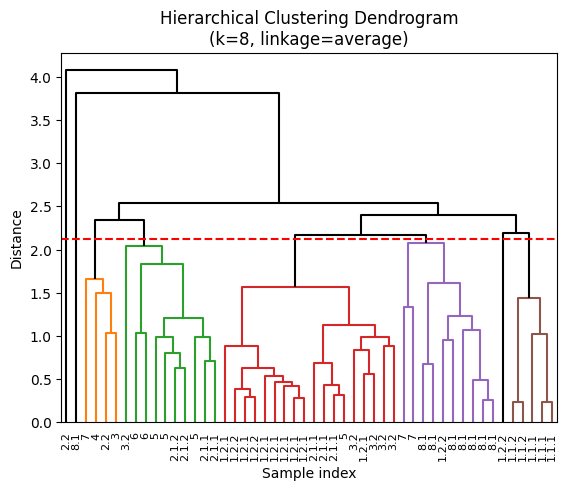

[4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 6 0 1 3 3 3 1 1 1 2 7 2 3 3 3 1 3 2 1 1 1 3
 1 1 0 0 2 0 0 0 0 0 0 0 5]
Singletons:  3
Normalized Information Score: 0.6431108375045237, k=8, method=average


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


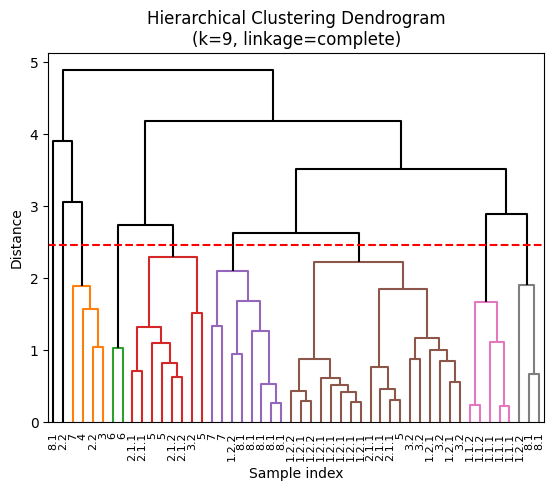

[6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 2 3 0 1 1 1 0 0 0 4 5 4 1 1 1 0 1 4 0 0 0 1
 8 8 3 3 4 3 3 3 3 2 3 2 7]
Singletons:  2
Normalized Information Score: 0.6509175156718776, k=9, method=complete


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


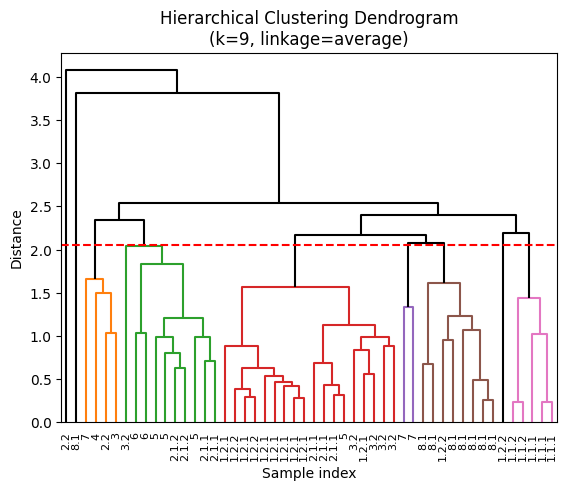

[4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 6 1 0 3 3 3 0 0 0 2 7 2 3 3 3 0 3 2 0 0 0 3
 0 0 8 8 2 1 1 1 1 1 1 1 5]
Singletons:  3
Normalized Information Score: 0.6725989638302103, k=9, method=average


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


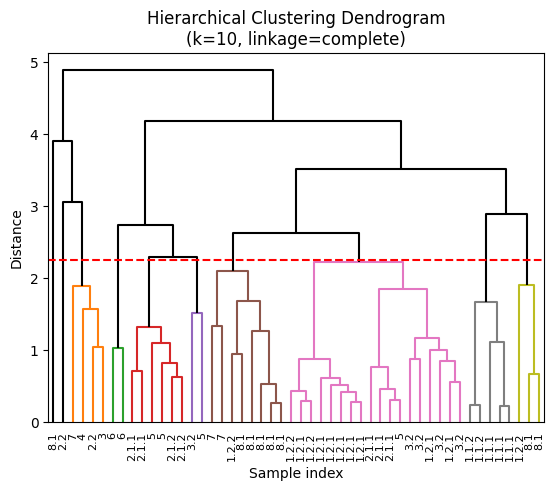

[6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 2 1 9 0 0 0 9 9 9 4 5 4 0 0 0 3 0 4 9 3 9 0
 8 8 1 1 4 1 1 1 1 2 1 2 7]
Singletons:  2
Normalized Information Score: 0.6593293493712017, k=10, method=complete


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


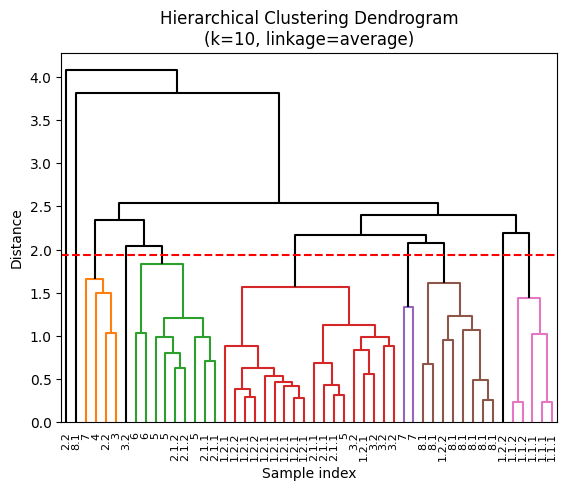

[4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 6 1 0 3 3 3 0 0 0 2 7 2 3 3 3 9 3 2 0 0 0 3
 0 0 8 8 2 1 1 1 1 1 1 1 5]
Singletons:  4
Normalized Information Score: 0.6911610595661456, k=10, method=average


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


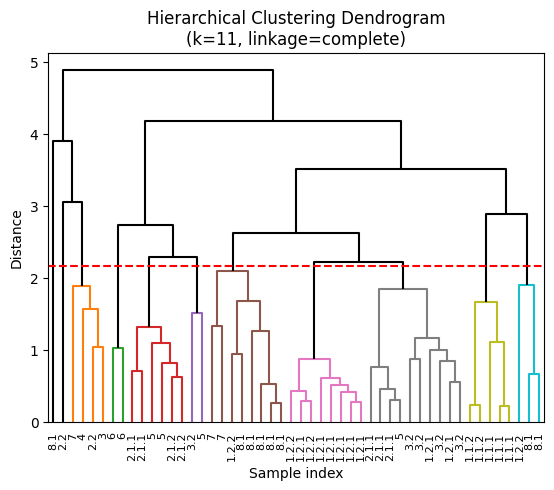

[ 6  6  6  6  6 10  4  4 10 10 10 10 10 10 10  2  0  9  4  4  4  9  9  9
  1  5  1  4  4  4  3  4  1  9  3  9  4  8  8  0  0  1  0  0  0  0  2  0
  2  7]
Singletons:  2
Normalized Information Score: 0.6887372467281409, k=11, method=complete


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


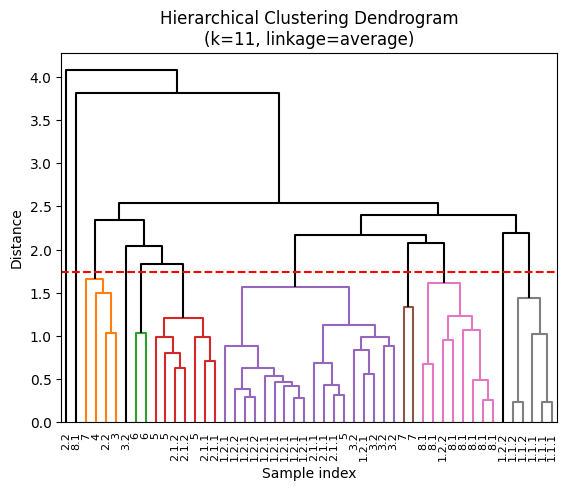

[ 4  4  4  4  4  3  3  3  3  3  3  3  3  3  3  6  1  2  3  3  3  2  2  2
  0  7  0  3  3  3  9  3  0  2  2  2  3 10 10  8  8  0  1  1  1  1  1  1
  1  5]
Singletons:  4
Normalized Information Score: 0.717608597685853, k=11, method=average


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


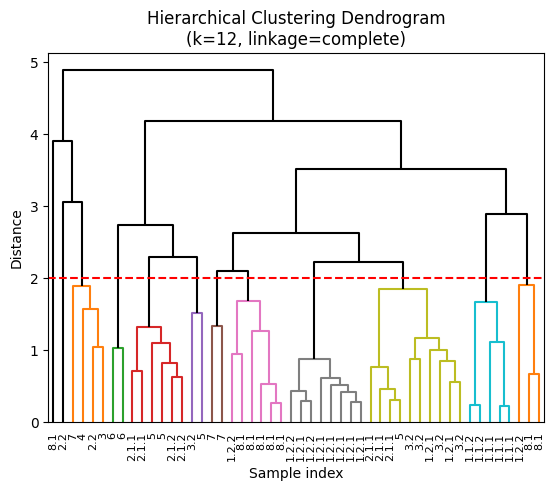

[ 6  6  6  6  6 10  4  4 10 10 10 10 10 10 10  0  2  9  4  4  4  9  9  9
  1 11  1  4  4  4  3  4  1  9  3  9  4  8  8  5  5  1  2  2  2  2  0  2
  0  7]
Singletons:  2
Normalized Information Score: 0.7130279768344125, k=12, method=complete


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


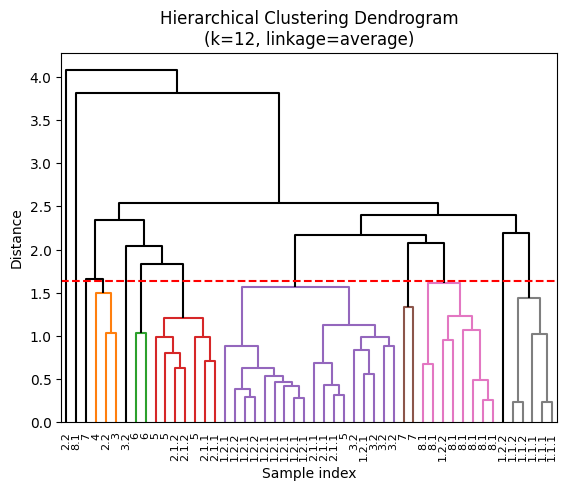

[ 4  4  4  4  4  1  1  1  1  1  1  1  1  1  1  6  0  2  1  1  1  2  2  2
  3  7  3  1  1  1  9  1  3  2  2  2  1 10 10  8  8 11  0  0  0  0  0  0
  0  5]
Singletons:  5
Normalized Information Score: 0.7297886262485146, k=12, method=average


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


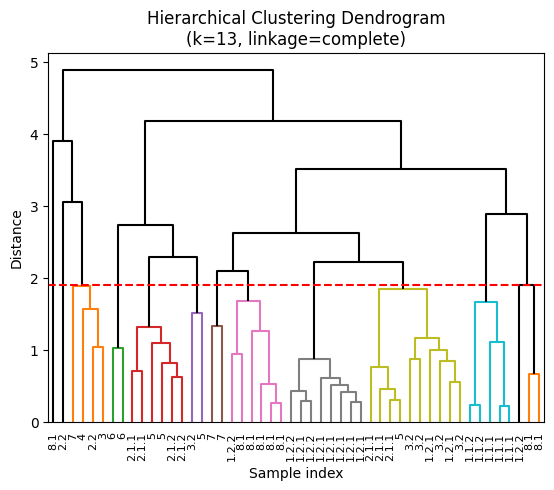

[ 6  6  6  6  6 10  1  1 10 10 10 10 10 10 10 12  2  4  1  1  1  4  4  4
  0 11  0  1  1  1  3  1  0  4  3  4  1  8  8  5  5  0  2  2  2  2  9  2
  9  7]
Singletons:  3
Normalized Information Score: 0.7231330879845802, k=13, method=complete


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


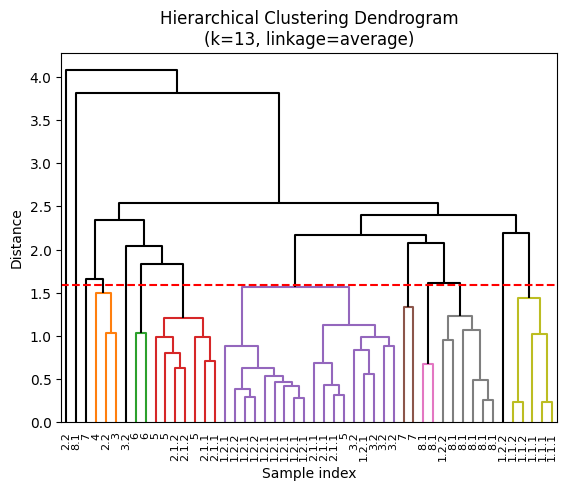

[ 4  4  4  4  4  0  0  0  0  0  0  0  0  0  0  6  8  2  0  0  0  2  2  2
  1  7  1  0  0  0  9  0  1  2  2  2  0 10 10  3  3 11  8  8  8  8  5  8
  5 12]
Singletons:  5
Normalized Information Score: 0.7165352680273946, k=13, method=average


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


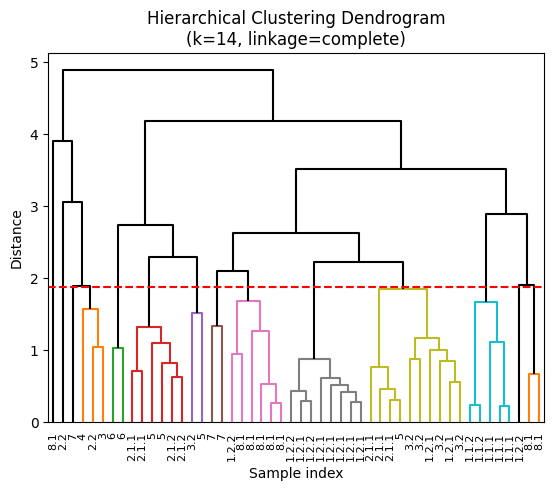

[ 6  6  6  6  6 10  0  0 10 10 10 10 10 10 10 12  2  4  0  0  0  4  4  4
  1 11  1  0  0  0  3  0  1  4  3  4  0  8  8  5  5 13  2  2  2  2  9  2
  9  7]
Singletons:  4
Normalized Information Score: 0.7348868219139271, k=14, method=complete


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


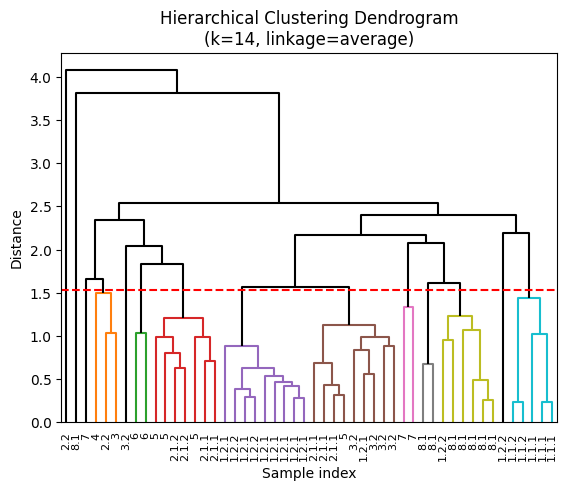

[ 1  1  1  1  1  6  6  4  6  6  6  6  6  6  6 13  8  2  4  4  4  2  2  2
  0  7  0  4  4  4  9  4  0  2  2  2  4 10 10  3  3 11  8  8  8  8  5  8
  5 12]
Singletons:  5
Normalized Information Score: 0.7561220493752744, k=14, method=average


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


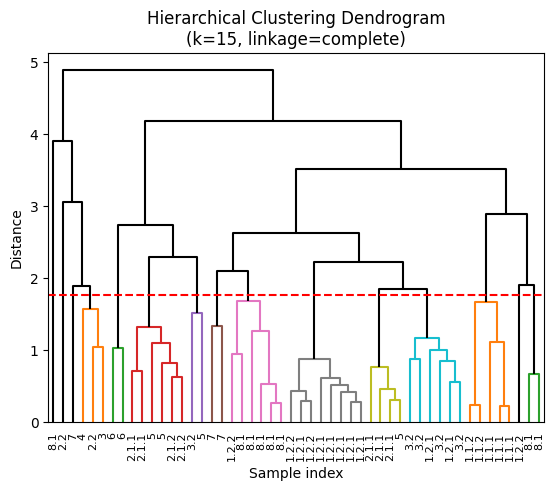

[ 2  2  2  2  2 10  6  6 10 10 10 10 10 10 10 12  0  4 14 14 14  4  4  4
  1 11  1  6  6  6  3  6  1  4  3  4 14  8  8  5  5 13  0  0  0  0  9  0
  9  7]
Singletons:  4
Normalized Information Score: 0.7691437610002476, k=15, method=complete


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


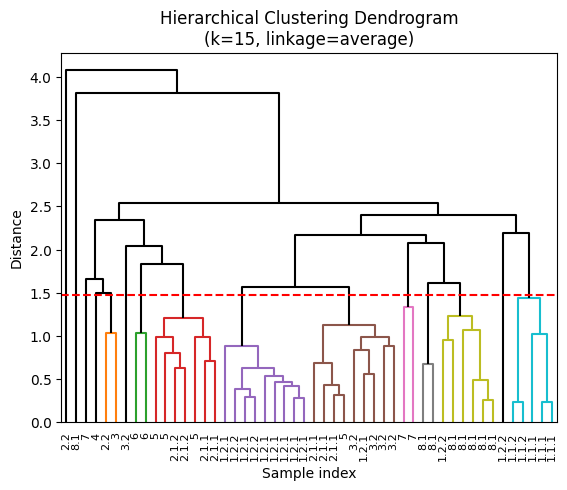

[ 0  0  0  0  0  6  6  4  6  6  6  6  6  6  6 13  3  2  4  4  4  2  2  2
  8  7  8  4  4  4  9  4 14  2  2  2  4 10 10  1  1 11  3  3  3  3  5  3
  5 12]
Singletons:  6
Normalized Information Score: 0.7658274963912931, k=15, method=average


In [91]:
for k in range(5,16):
    for linkage_method in ['complete', 'average']:
        labels = hier_clust(mixed_distances, k, linkage_method)
        print(labels)
        print("Singletons: ",(np.unique(labels, return_counts=True)[1] == 1).sum())
        print(f"Normalized Information Score: {normalized_mutual_info_score(groups, labels, average_method='geometric')}, k={k}, method={linkage_method}")

In [92]:
final_labels = AgglomerativeClustering(n_clusters=15, linkage='average', compute_distances=True, metric='precomputed').fit_predict(mixed_distances)
birds['predicted_group'] = final_labels
birds['group'] = groups
birds

,AR,wload,belly,ftype,mean_wspan,mean_weight,BMI,WSI,group,group_ID,predicted_group
species,,,,,,,,,,,
naurulokki,0.762605,0.060185,white,B,0.334204,0.022779,0.214481,0.879054,laridae,1.1.1,0
harmaalokki,0.785714,0.212963,white,B,0.558747,0.093394,0.343958,0.670654,laridae,1.1.1,0
isolokki,0.785714,0.222222,white,B,0.624021,0.125285,0.400416,0.671464,laridae,1.1.1,0
kalatiira,0.974790,0.027778,white,B,0.242820,0.008884,0.000000,0.446080,sternidae,1.1.2,0
lapintiira,0.939076,0.009259,white,B,0.224543,0.007745,0.015081,0.526316,sternidae,1.1.2,0
suokukko,0.468487,0.083333,white,C,0.099217,0.007745,0.144386,0.405667,scolopacidae,1.2.1,6
taivaanvuohi,0.296218,0.101852,white,C,0.070496,0.006834,0.109788,0.239971,scolopacidae,1.2.1,6
lehtokurppa,0.247899,0.166667,dappled beige,C,0.164491,0.025513,0.274415,0.306220,scolopacidae,1.2.1,4
karikukko,0.569328,0.125000,white,C,0.091384,0.007745,0.222778,0.527379,scolopacidae,1.2.1,6
